In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
import seaborn as sns
import re

BASE_DIR = "./"

def average_by_epoch(df_list, x, y):
    epochs = [tuple(df['epoch'].tolist()) for df in df_list]
    assert len(set(epochs)) == 1
    xs = [df[x].tolist() for df in df_list]
    ys = [df[y].tolist() for df in df_list]

    xs = pd.DataFrame(xs).T.mean(axis=1).tolist()
    ys = pd.DataFrame(ys).T.mean(axis=1).tolist()

    df = pd.DataFrame(zip(xs, ys), columns=[x, y])

    return df

def read_adjusted_ppl():
    def concate(path):
        dfs = []
        paths = glob(path)
        for p in paths:
            p = pd.read_csv(p)
            dfs.append(p)
        df = pd.concat(dfs)
        return df
    df_valid = concate("../data/adjusted_metrics/valid_*.csv")
    df_test = concate("../data/adjusted_metrics/test_*.csv")
    df_valid = df_valid.drop_duplicates()
    df_test = df_test.drop_duplicates()
    return df_valid, df_test


def join_adjusted_ppl(path):
    df = pd.read_csv(p)
    df1 = pd.merge(df, DF_V, on='model_path')
    assert df1.shape[0] == df.shape[0]
    return df1


DF_V, DF_T = read_adjusted_ppl()

In [29]:
## Canary insertion
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)

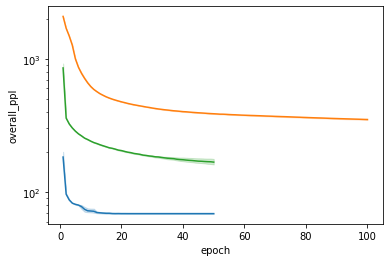

In [24]:
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_nodps[df_nodps.epoch!=0])
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_dps[df_dps.epoch!=0])
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_partialdps[df_partialdps.epoch!=0])
plt.yscale('log')

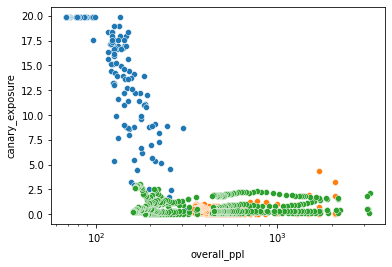

In [28]:
xvar = 'overall_ppl'
yvar = 'canary_exposure'
plotfunc = sns.scatterplot
df1 = df_nodps[df_nodps.epoch!=0]
df2 = df_dps[df_dps.epoch!=0]
df3 = df_partialdps[df_partialdps.epoch!=0]

ax = plotfunc(x=xvar, y=yvar, data=df1)
ax = plotfunc(x=xvar, y=yvar, data=df2)
ax = plotfunc(x=xvar, y=yvar, data=df3)
plt.xscale('log')

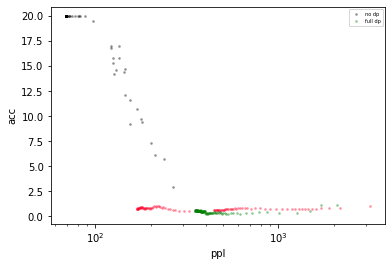

In [34]:
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=3
alpha = 0.3
x_var = 'overall_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

# average
df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
df_dps = [average_by_epoch(df_dps, x_var, metrics)]
df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = ""
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color='red', s=dot_size, alpha=alpha, label=label)
    scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color="black", s=dot_size, alpha=alpha, label='no dp')


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color="green", s=dot_size, alpha=alpha, label='full dp')


# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('acc')
plt.show()

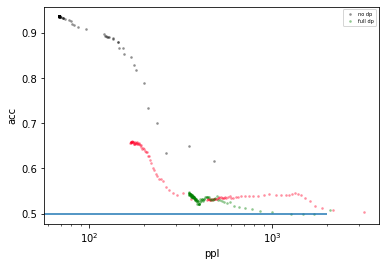

In [38]:
# membership inference
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "nodp", "final_fix", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dp", "final_fix", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "partialdp", "final_fix", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=3
alpha = 0.3
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

# average
df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
df_dps = [average_by_epoch(df_dps, x_var, metrics)]
df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = ""
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color='red', s=dot_size, alpha=alpha, label=label)
    scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color="black", s=dot_size, alpha=alpha, label='no dp')


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color="green", s=dot_size, alpha=alpha, label='full dp')


plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('acc')
plt.show()

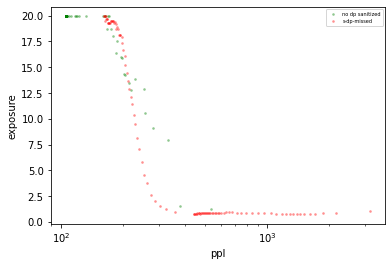

In [49]:
# missed experiments
#nodp normalized
df_nodps_normalized = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized", "*")):
    df_nodps_normalized.append(join_adjusted_ppl(p))

#partial dp missed
df_partialdps_missed = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed", "*")):
    df_partialdps_missed.append(join_adjusted_ppl(p))





# missed
dot_size=3
alpha = 0.3
x_var, y_var = "private_ppl", "canary_exposure"
x_var, y_var = "epoch", "private_ppl"
x_var, y_var = "overall_ppl", "canary_exposure"




# average
df_nodps_normalized = [average_by_epoch(df_nodps_normalized, x_var, y_var)]
df_partialdps_missed = [average_by_epoch(df_partialdps_missed, x_var, y_var)]



NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter


for i, df_nodp_normalized in enumerate(df_nodps_normalized):
    plot_func(df_nodp_normalized[x_var].tolist()[1:], df_nodp_normalized[y_var].tolist()[1:], color="green", s=dot_size, alpha=alpha, label='no dp sanitized')




for i, df_partialdp in enumerate(df_partialdps_missed):
    df_partialdp = df_partialdp.iloc[:100]
    label = "s-dp-missed"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[y_var].tolist()[1:], color="red", s=dot_size, alpha=alpha, label=label)
        # scatters.set_color(cm(i//1*1.0/NUM_COLORS))





# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('exposure')
plt.show()

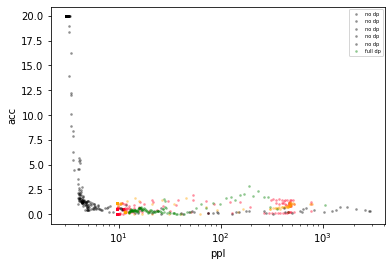

In [71]:
# dialog, canary insertion
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog",  "nodp", "bs32", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "dp", "final", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "partialdp", "final",  "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=3
alpha = 0.3
x_var = 'overall_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

# average
# df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
# # df_dps = [average_by_epoch(df_dps, x_var, metrics)]
# df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = ""
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color='red', s=dot_size, alpha=alpha, label=label)
    scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color="black", s=dot_size, alpha=alpha, label='no dp')


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color="green", s=dot_size, alpha=alpha, label='full dp')


# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('acc')
plt.show()

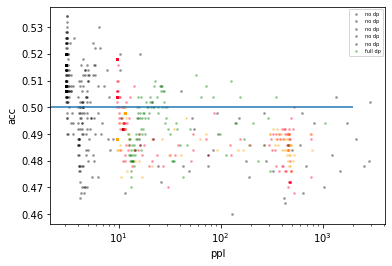

In [73]:
# dialog, membership inference, full name
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", "final_fix", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", "final_fix", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", "final_fix", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=3
alpha = 0.3
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

# average
# df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
# # df_dps = [average_by_epoch(df_dps, x_var, metrics)]
# df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = ""
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color='red', s=dot_size, alpha=alpha, label=label)
    scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color="black", s=dot_size, alpha=alpha, label='no dp')


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color="green", s=dot_size, alpha=alpha, label='full dp')


plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('acc')
plt.show()

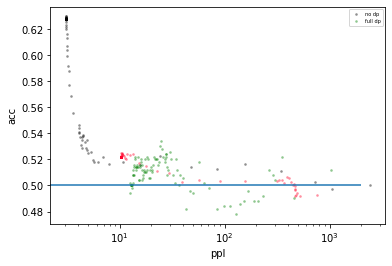

In [72]:
# dialog, membership inference, first name
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", "final_fix_firstname", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", "final_fix_firstname", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", "final_fix_firstname", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=3
alpha = 0.3
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

# average
df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
# df_dps = [average_by_epoch(df_dps, x_var, metrics)]
df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = ""
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color='red', s=dot_size, alpha=alpha, label=label)
    scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color="black", s=dot_size, alpha=alpha, label='no dp')


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color="green", s=dot_size, alpha=alpha, label='full dp')


plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('acc')
plt.show()